# Red Wine Quality Prediction Project

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


## Importing Datset

In [2]:
df=pd.read_csv("C:\\Users\\KHUSHBOO RANI\\OneDrive\\Desktop\\Projects\\ML project\\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# first 10 rows of the dataframe
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# 10 random samples rows of the dataframe

df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
806,8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
1375,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5
36,7.8,0.60,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6
365,10.0,0.42,0.50,3.4,0.107,7.0,21.0,0.99790,3.26,0.93,11.8,6
991,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5
331,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6
505,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,7
1289,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5


In [5]:
# Last 10 rows of the dataframe
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Exploratry Data Analysis (EDA)


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' are the dependent veriables and 'quality' is independent it means target variable

In [7]:
df.shape

(1599, 12)

There is tottal 1599 rows and 12 columns present

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All columns have numerical values.

In [9]:
# Checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

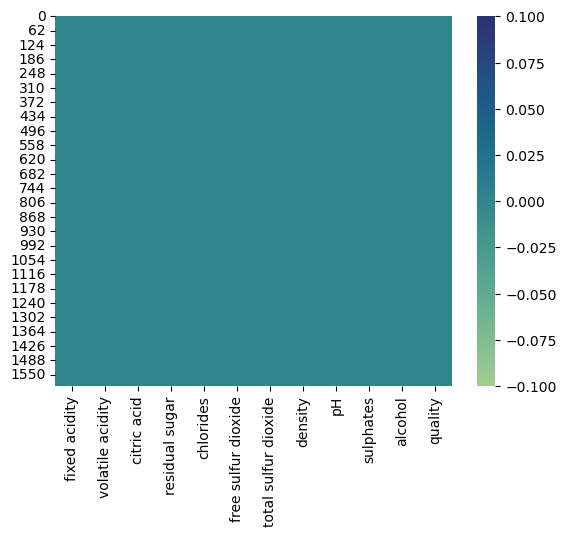

In [10]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull(),cmap="crest",)

There is no null vale present in dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Over view of the dataframe

## Data Visualaization and Analysis

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


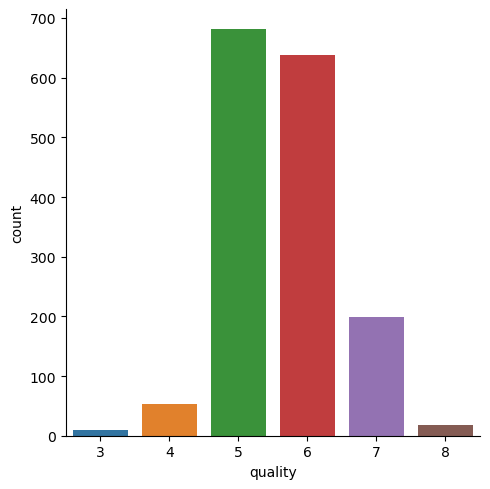

In [13]:
sns.catplot(x="quality",data=df,kind="count")
plt.show()

There is total 6 numbers of Wine Quality and quality 5 and 6 are the highest in numbers, and quality 3 is much lower in count.

## Checking quality dependent of columns

[]

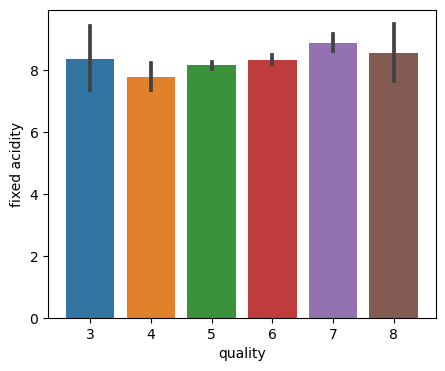

In [14]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="fixed acidity",data=df)
plt.plot()

[]

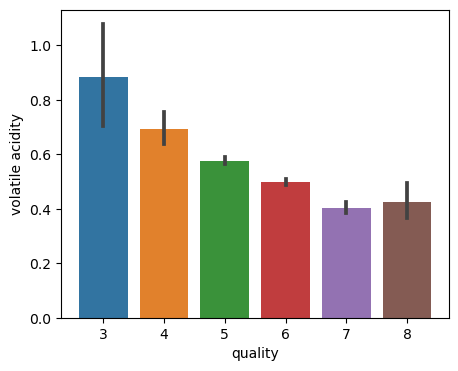

In [15]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.plot()

voilatile acidity is high then the guality is low

[]

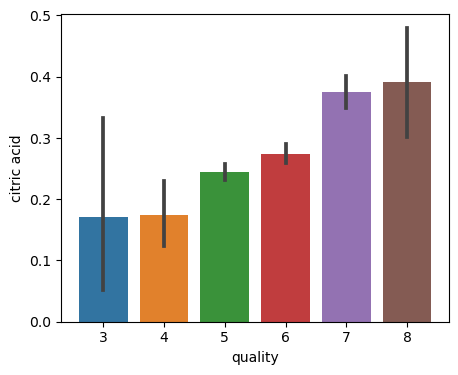

In [16]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="citric acid",data=df)
plt.plot()

citric acid ih high it means quality is high

[]

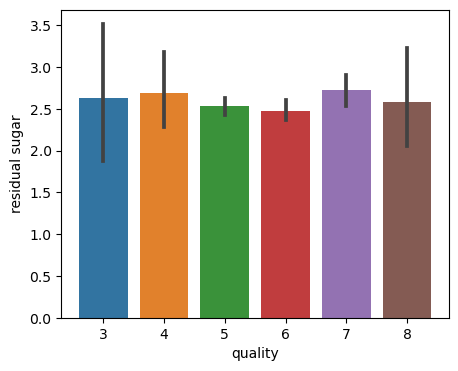

In [17]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="residual sugar",data=df)
plt.plot()

residual suger is in near 2.5 then quality is higher

[]

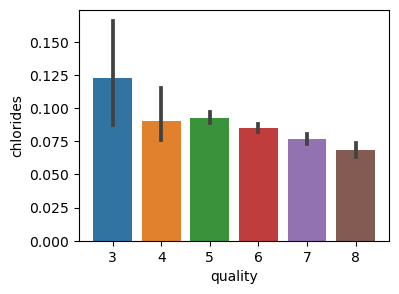

In [18]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="chlorides",data=df)
plt.plot()

chlorides is in betwwen 0.6 to 0.8 then quality is best and if it increase then the quality will decrease

[]

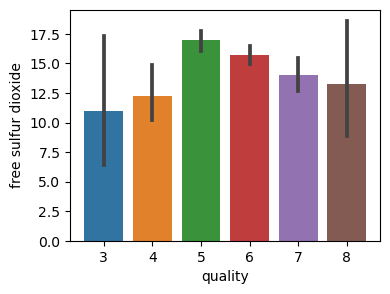

In [19]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="free sulfur dioxide",data=df)
plt.plot()

free sulfur dioxide is in 12.5 then quality is best

[]

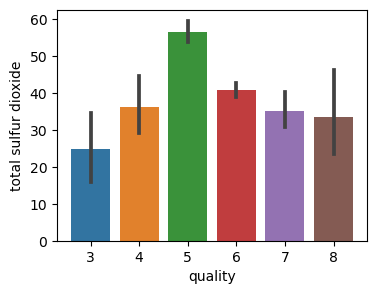

In [20]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="total sulfur dioxide",data=df)
plt.plot()

total sulfur dioxide is in 35 then quality is max and if it is increase or decrese then quality will decrease

[]

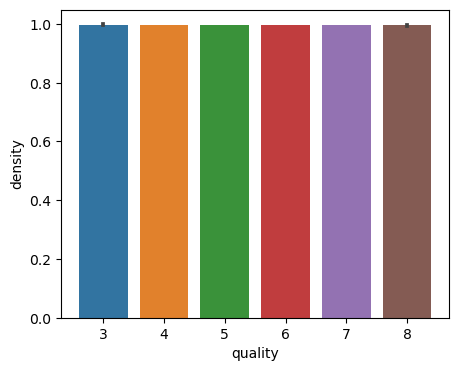

In [21]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="density",data=df)
plt.plot()

Density dosnot effect in quality so we will drop it

In [22]:
df= df.drop("density",axis=1)


[]

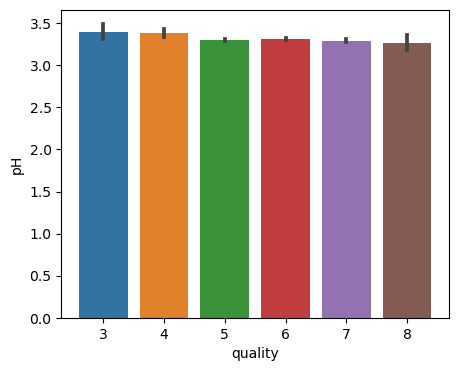

In [23]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="pH",data=df)
plt.plot()

pH valuese dosnot effect much on quality so we also drop it

In [24]:
df= df.drop("pH",axis=1)


[]

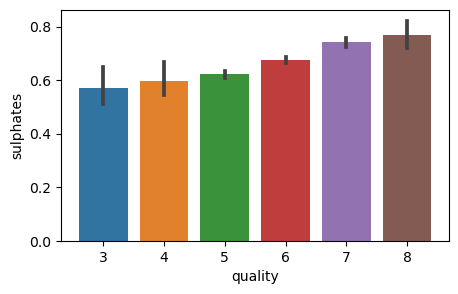

In [25]:
plot = plt.figure(figsize=(5,3))
sns.barplot(x="quality",y="sulphates",data=df)
plt.plot()

sulphates increase then quality will also increase

[]

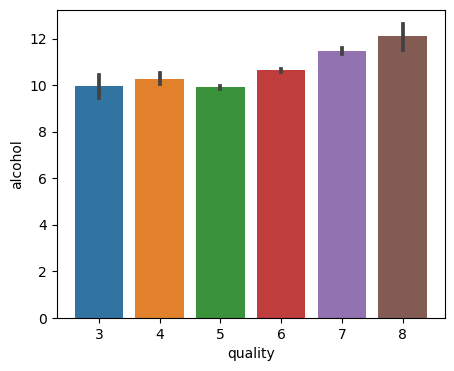

In [26]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="alcohol",data=df)
plt.plot()

Alcohol increase then quality will also increase

In [27]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

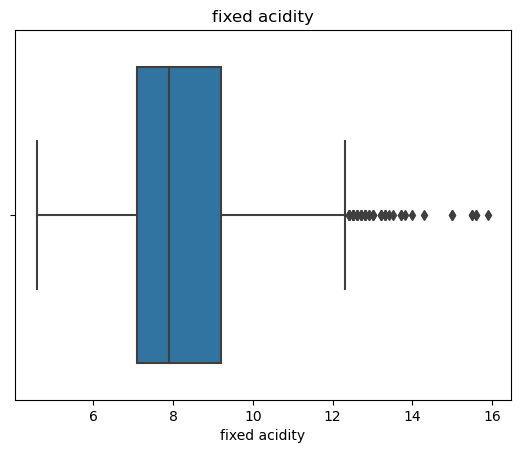

In [28]:
sns.boxplot(x=df["fixed acidity"])
plt.title("fixed acidity")
plt.show()

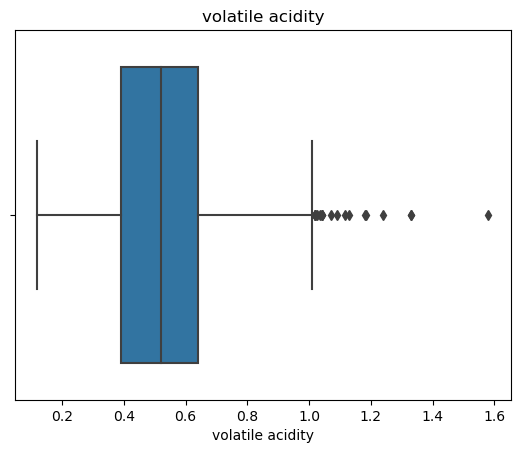

In [29]:
sns.boxplot(x=df["volatile acidity"])
plt.title("volatile acidity")
plt.show()

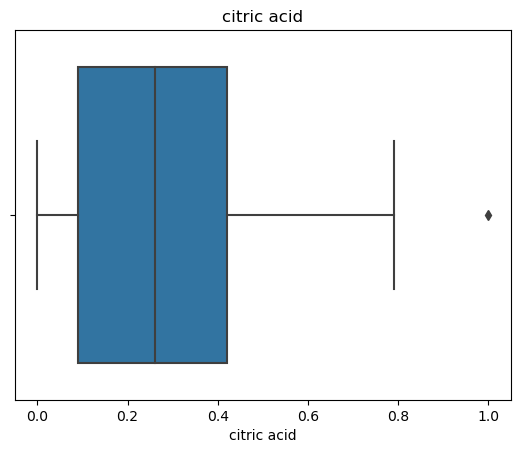

In [30]:
sns.boxplot(x=df["citric acid"])
plt.title("citric acid")
plt.show()

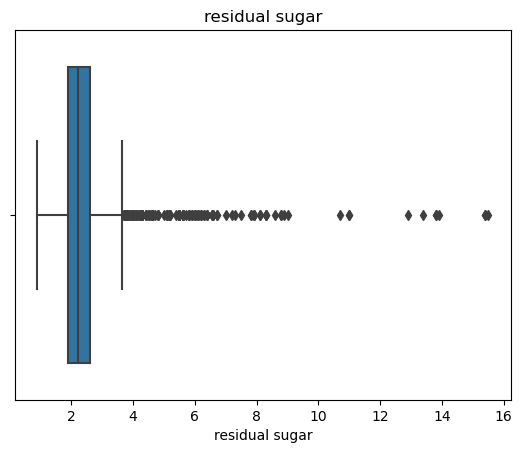

In [31]:
sns.boxplot(x=df["residual sugar"])
plt.title("residual sugar")
plt.show()

treated outliers for residual sugar

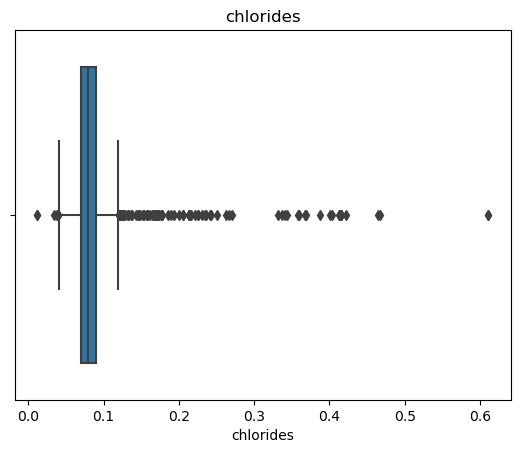

In [32]:
sns.boxplot(x=df["chlorides"])
plt.title("chlorides")
plt.show()

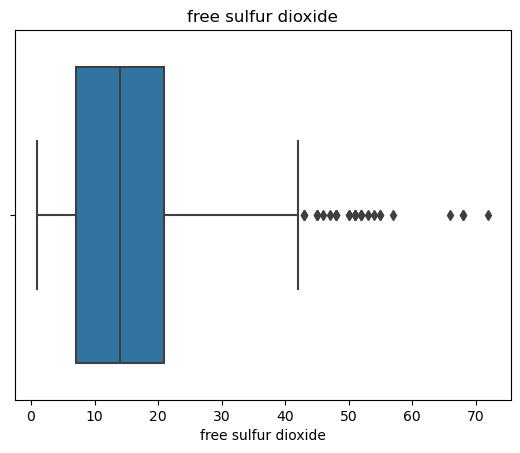

In [33]:
sns.boxplot(x=df["free sulfur dioxide"])
plt.title("free sulfur dioxide")
plt.show()

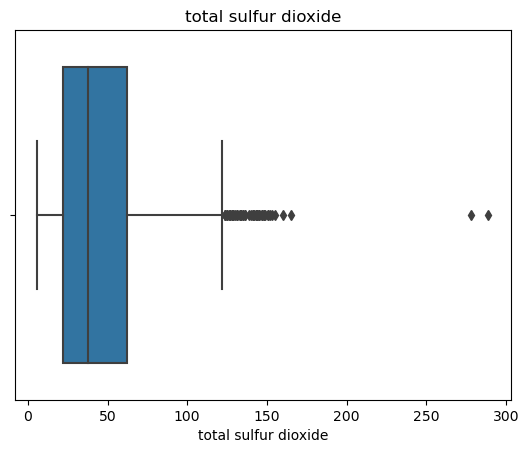

In [34]:
sns.boxplot(x=df["total sulfur dioxide"])
plt.title("total sulfur dioxide")
plt.show()

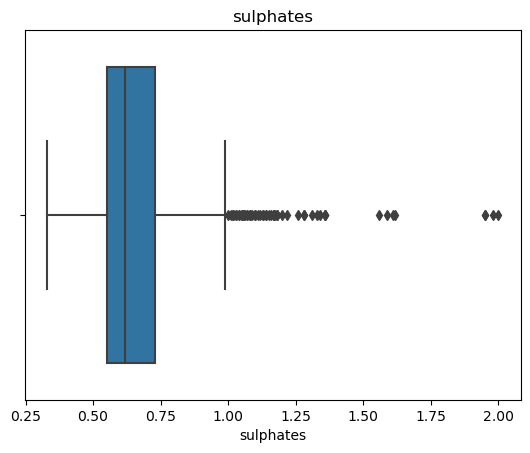

In [35]:
sns.boxplot(x=df["sulphates"])
plt.title("sulphates")
plt.show()

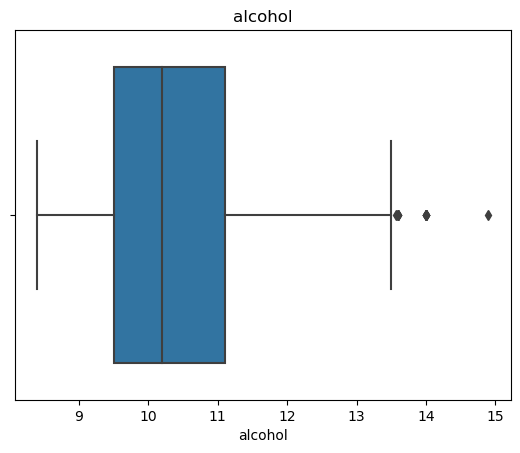

In [36]:
sns.boxplot(x=df["alcohol"])
plt.title("alcohol")
plt.show()

there is some outliers in each columns

## Removing outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3

In [38]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
        120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  396,  400,  400,  442,  451,  459,  467,  480,  494,
        515,  517,  544,  554,  555,  557,  568,  584,  588,  591,  595,
        614,  636,  639,  649,  649,  651,  652,  652,  652,  672,  672,
        684,  690,  690,  692,  692,  723,  724,  730,  754,  776,  777,
        795,  821,  832,  899,  911,  917,  923,  925,  926,  982, 1043,
       1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1131, 1154, 1165,
       1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1270, 1288,
       1289, 1295, 1296, 1299, 1299, 1312, 1319, 1319, 1358, 1367, 1370,
       1370, 1372, 1372, 1374, 1374, 1434, 1434, 1

<function matplotlib.pyplot.show(close=None, block=None)>

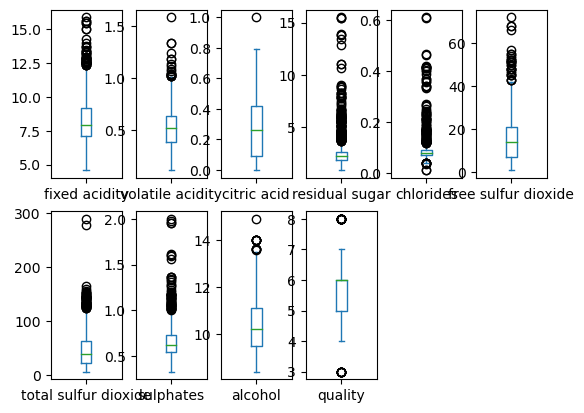

In [39]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show

In [40]:
df=df[(z<3).all(axis=1)]

<function matplotlib.pyplot.show(close=None, block=None)>

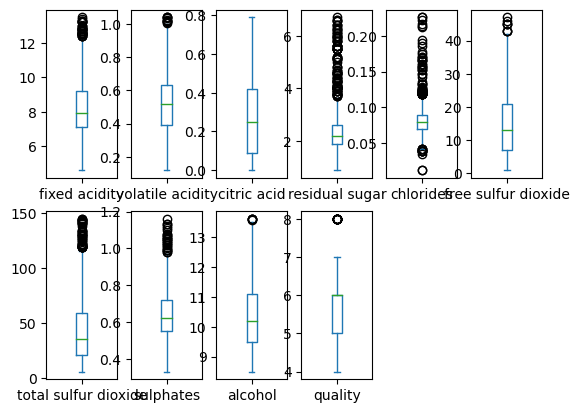

In [41]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show

In [42]:
df.shape

(1465, 10)

## Correlation

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,8.292491,0.522734,0.264976,2.388259,0.081186,15.178840,44.035495,0.641802,10.438020,5.662799
std,1.659168,0.169052,0.190714,0.872740,0.021216,9.343591,29.581532,0.129776,1.036677,0.782066
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,59.000000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.160000,13.600000,8.000000


In [44]:
#checking the correlation between target variables and independent variables 
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288724,0.694709,0.186178,0.198507,-0.151496,-0.104238,0.203046,-0.042327,0.137441
volatile acidity,-0.288724,1.000000,-0.587104,0.035796,0.081875,0.003280,0.101558,-0.336183,-0.215159,-0.354290
citric acid,0.694709,-0.587104,1.000000,0.188287,0.102888,-0.070494,0.008247,0.300656,0.159411,0.241752
residual sugar,0.186178,0.035796,0.188287,1.000000,0.136816,-0.002452,0.096531,0.080325,0.145222,0.056593
chlorides,0.198507,0.081875,0.102888,0.136816,1.000000,-0.072483,0.029686,0.035781,-0.224910,-0.115553
free sulfur dioxide,-0.151496,0.003280,-0.070494,-0.002452,-0.072483,1.000000,0.663151,0.045058,-0.062227,-0.061568
total sulfur dioxide,-0.104238,0.101558,0.008247,0.096531,0.029686,0.663151,1.000000,-0.048447,-0.236999,-0.229071
sulphates,0.203046,-0.336183,0.300656,0.080325,0.035781,0.045058,-0.048447,1.000000,0.224676,0.377561
alcohol,-0.042327,-0.215159,0.159411,0.145222,-0.224910,-0.062227,-0.236999,0.224676,1.000000,0.496402
quality,0.137441,-0.354290,0.241752,0.056593,-0.115553,-0.061568,-0.229071,0.377561,0.496402,1.000000


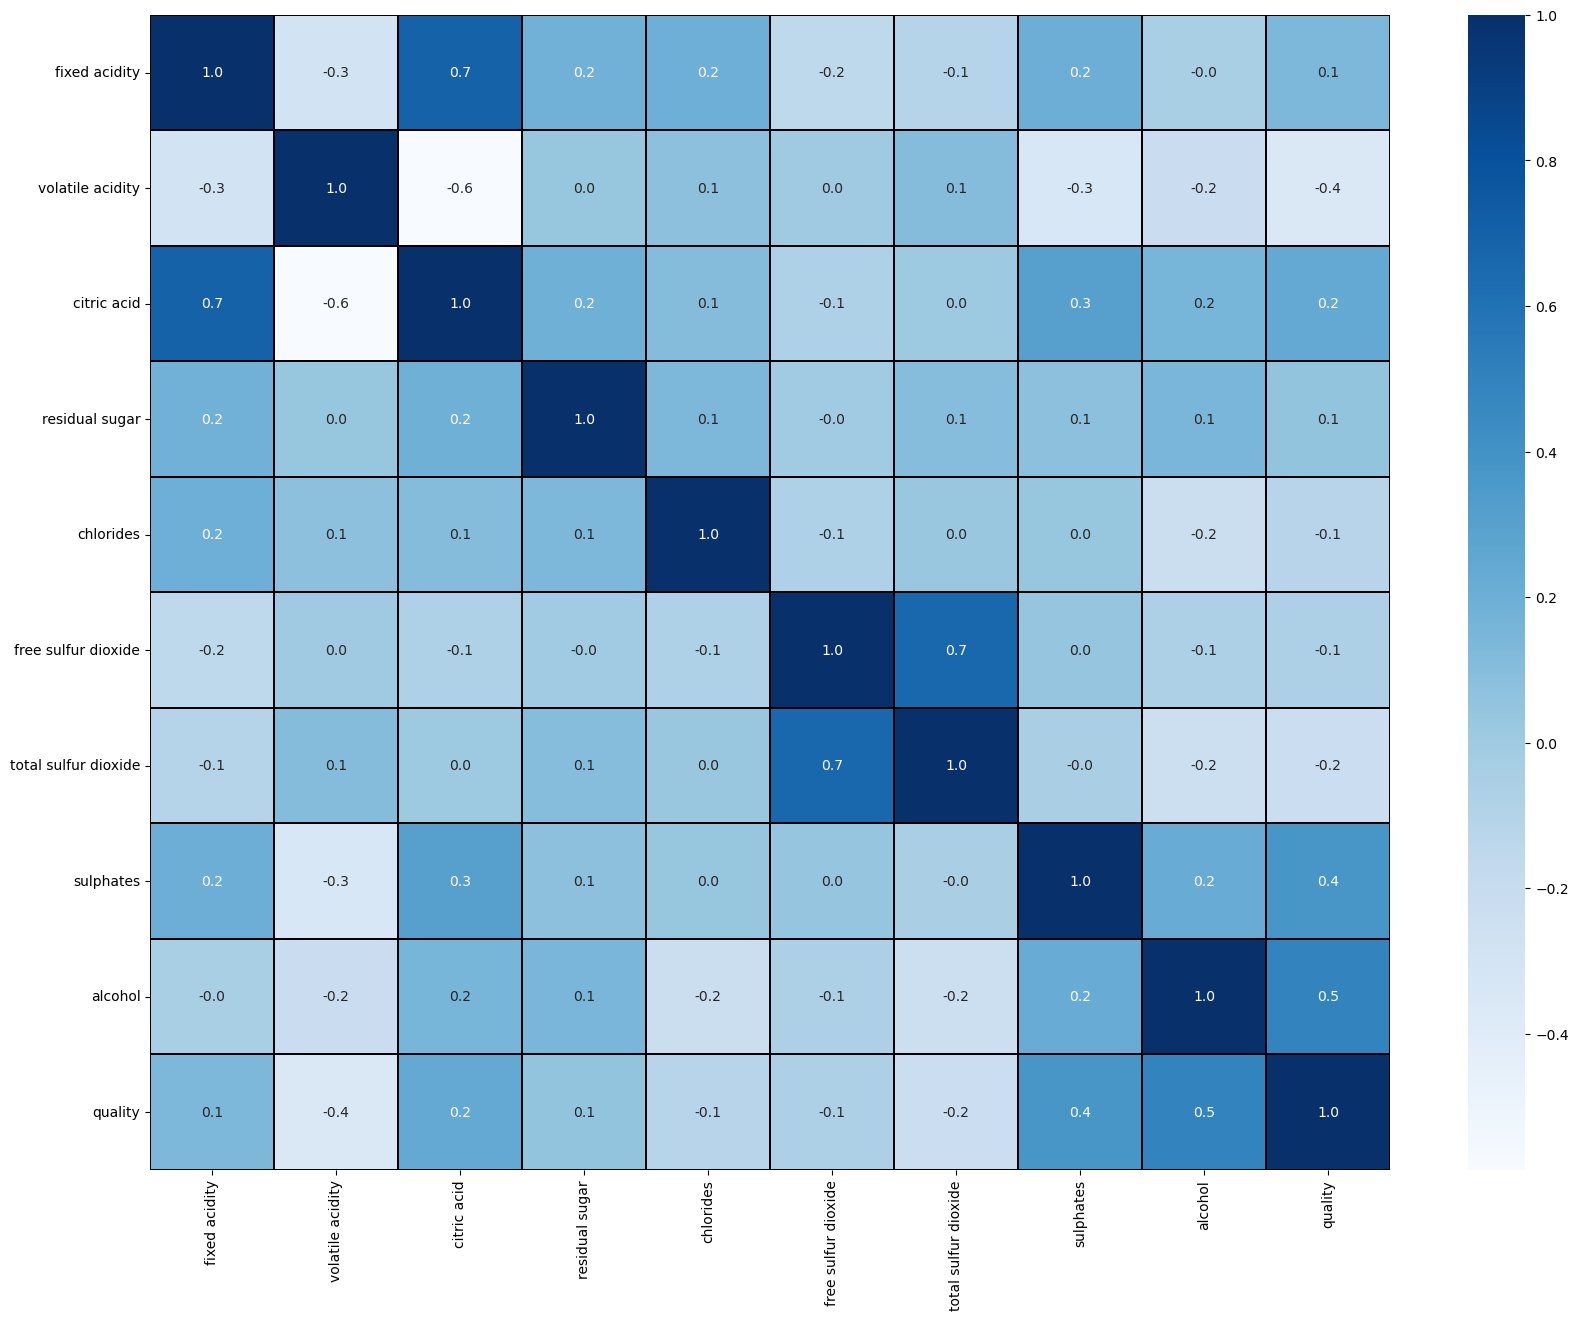

In [45]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()


free sulpher dioxide and total sulpher dioxide is corelater

<Axes: title={'center': 'Correlation with quality'}>

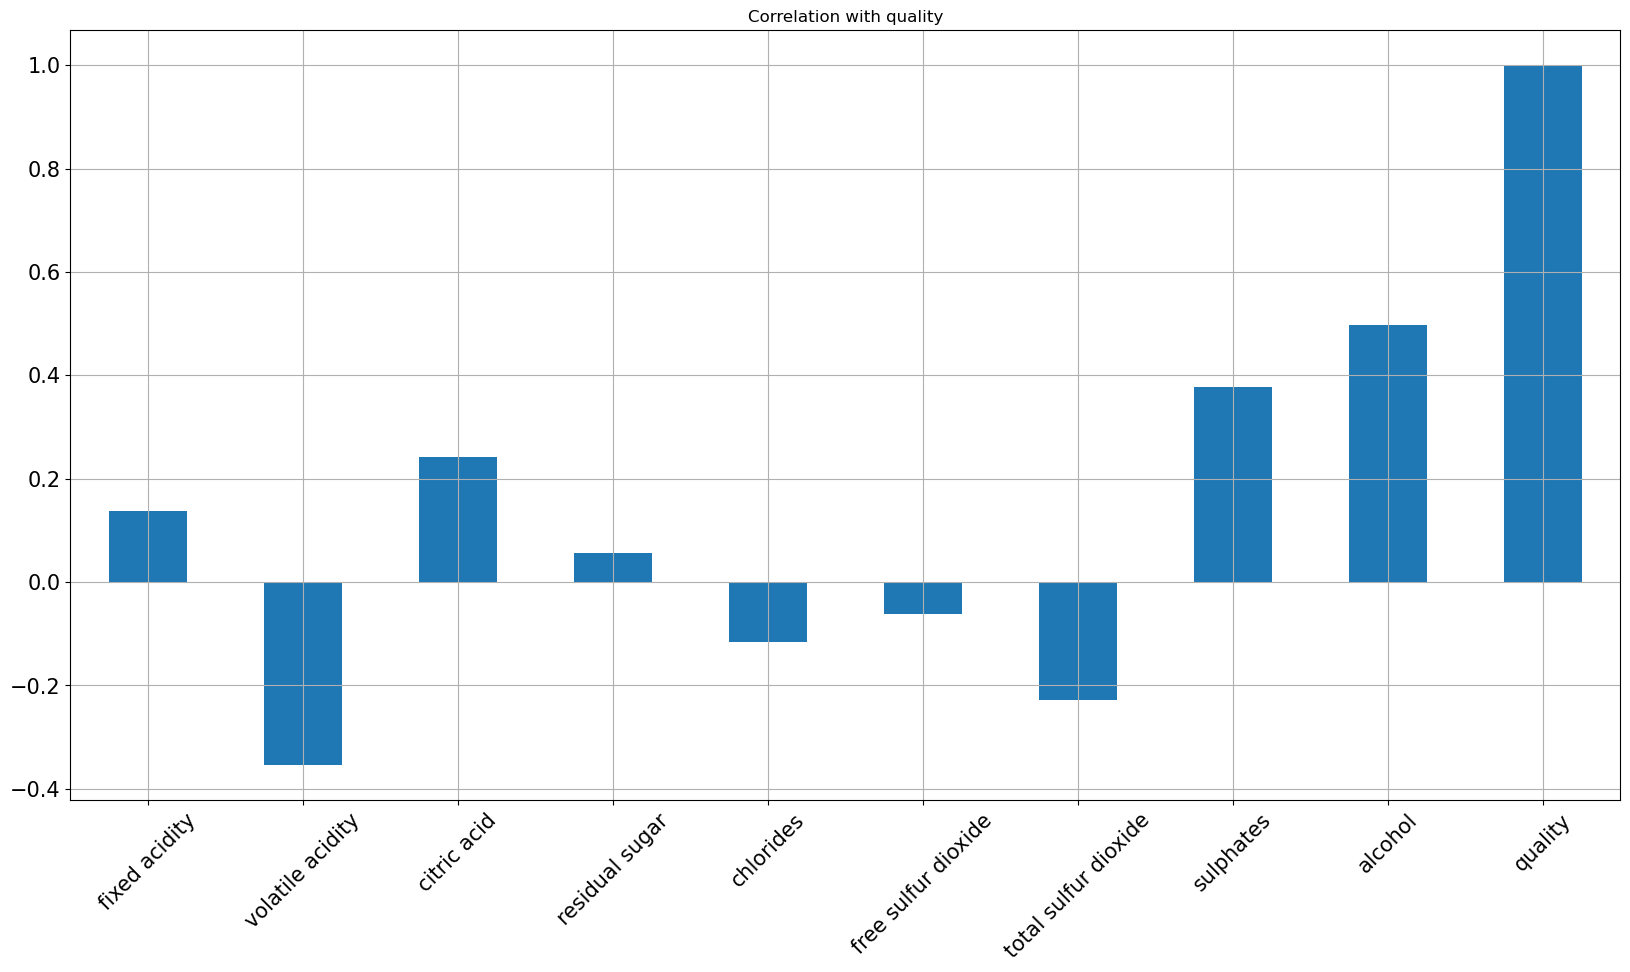

In [46]:
df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

From the aboove bar plot we can notice the positive and negative correlation between the feature and the target. Here the feature Chloride and Residual sugar have very less correlation with the quality.

## Data Preprocessing

## Seprating features and label


In [47]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [49]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (1025, 9)
y_train shape: (1025,)
x_test shape: (440, 9)
y_test.shape: (440,)


## Checking accuracy for RandomForestClassifier


In [50]:

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predRFC)*100)
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predRFC))
print("")
print("Classification Report:\n", classification_report(y_test, predRFC))


Accuracy: 70.45454545454545

Confusion Matrix:
 [[  0  12   3   0   0]
 [  1 134  37   0   0]
 [  0  38 144  13   0]
 [  0   1  22  32   1]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.72      0.78      0.75       172
           6       0.70      0.74      0.72       195
           7       0.70      0.57      0.63        56
           8       0.00      0.00      0.00         2

    accuracy                           0.70       440
   macro avg       0.42      0.42      0.42       440
weighted avg       0.68      0.70      0.69       440



## MultinomialNB

In [51]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB=MNB.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_MNB)*100)
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_MNB))
print("")
print("Classification Report:\n", classification_report(y_test, pred_MNB))

Accuracy: 43.86363636363637

Confusion Matrix:
 [[ 0  5  7  3  0]
 [ 0 71 66 35  0]
 [ 0 56 91 48  0]
 [ 0  7 18 31  0]
 [ 0  0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.51      0.41      0.46       172
           6       0.50      0.47      0.48       195
           7       0.26      0.55      0.36        56
           8       0.00      0.00      0.00         2

    accuracy                           0.44       440
   macro avg       0.25      0.29      0.26       440
weighted avg       0.45      0.44      0.44       440



## K Neighbors Classification

In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("")
print("Classification Report:\n", classification_report(y_test, pred_knn))

Accuracy: 0.4909090909090909

Confusion Matrix:
 [[  1  10   2   2   0]
 [  1 107  60   4   0]
 [  1  90  91  13   0]
 [  0   9  29  17   1]
 [  0   1   0   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.33      0.07      0.11        15
           5       0.49      0.62      0.55       172
           6       0.50      0.47      0.48       195
           7       0.46      0.30      0.37        56
           8       0.00      0.00      0.00         2

    accuracy                           0.49       440
   macro avg       0.36      0.29      0.30       440
weighted avg       0.48      0.49      0.48       440



## Support vector classifier

rbf

In [53]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)
predsvc_rbf=svc_rbf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_rbf))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_rbf))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_rbf))

Accuracy: 0.475

Confusion Matrix:
 [[  0   5  10   0   0]
 [  0  68 104   0   0]
 [  0  54 141   0   0]
 [  0   7  49   0   0]
 [  0   0   2   0   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.51      0.40      0.44       172
           6       0.46      0.72      0.56       195
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00         2

    accuracy                           0.48       440
   macro avg       0.19      0.22      0.20       440
weighted avg       0.40      0.47      0.42       440



linear

In [54]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)
predsvc_linar=svc_linear.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_linar))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_linar))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_linar))

Accuracy: 0.5931818181818181

Confusion Matrix:
 [[  0  12   3   0   0]
 [  0 137  34   1   0]
 [  0  72 111  12   0]
 [  0   2  41  13   0]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.61      0.80      0.69       172
           6       0.58      0.57      0.58       195
           7       0.48      0.23      0.31        56
           8       0.00      0.00      0.00         2

    accuracy                           0.59       440
   macro avg       0.34      0.32      0.32       440
weighted avg       0.56      0.59      0.57       440



poly

In [55]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)
predsvc_poly=svc_poly.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_poly))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_poly))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_poly))

Accuracy: 0.5022727272727273

Confusion Matrix:
 [[  0   2  13   0   0]
 [  0  45 127   0   0]
 [  0  19 176   0   0]
 [  0   2  54   0   0]
 [  0   0   2   0   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.66      0.26      0.38       172
           6       0.47      0.90      0.62       195
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00         2

    accuracy                           0.50       440
   macro avg       0.23      0.23      0.20       440
weighted avg       0.47      0.50      0.42       440



## DecisionTreeClassifier

In [56]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_test, pred_dtc))


Accuracy: 0.5840909090909091

Confusion Matrix:
 [[  0   8   5   2   0]
 [  5 111  46  10   0]
 [  7  44 115  25   4]
 [  0   2  17  31   6]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.67      0.65      0.66       172
           6       0.62      0.59      0.61       195
           7       0.45      0.55      0.50        56
           8       0.00      0.00      0.00         2

    accuracy                           0.58       440
   macro avg       0.35      0.36      0.35       440
weighted avg       0.60      0.58      0.59       440



## ExtraTreesClassifier

In [57]:
EXC=ExtraTreesClassifier()
EXC.fit(x_train,y_train)
pred_EXC=RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_EXC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_EXC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_EXC))

Accuracy: 0.7045454545454546

Confusion Matrix:
 [[  0  12   3   0   0]
 [  1 134  37   0   0]
 [  0  38 144  13   0]
 [  0   1  22  32   1]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.72      0.78      0.75       172
           6       0.70      0.74      0.72       195
           7       0.70      0.57      0.63        56
           8       0.00      0.00      0.00         2

    accuracy                           0.70       440
   macro avg       0.42      0.42      0.42       440
weighted avg       0.68      0.70      0.69       440



 ## GradientBoostingClassifier

In [58]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_GBC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_GBC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_GBC))

Accuracy: 0.6545454545454545

Confusion Matrix:
 [[  0  12   3   0   0]
 [  2 131  36   3   0]
 [  0  52 126  14   3]
 [  0   2  22  31   1]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.66      0.76      0.71       172
           6       0.67      0.65      0.66       195
           7       0.63      0.55      0.59        56
           8       0.00      0.00      0.00         2

    accuracy                           0.65       440
   macro avg       0.39      0.39      0.39       440
weighted avg       0.64      0.65      0.64       440



## AdaBoostClassifier

In [59]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ABC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ABC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ABC))

Accuracy: 0.2863636363636364

Confusion Matrix:
 [[11  0  3  1  0]
 [82 28 34 27  1]
 [49 32 50 60  4]
 [ 2  3 11 36  4]
 [ 0  0  0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           4       0.08      0.73      0.14        15
           5       0.44      0.16      0.24       172
           6       0.51      0.26      0.34       195
           7       0.29      0.64      0.40        56
           8       0.10      0.50      0.17         2

    accuracy                           0.29       440
   macro avg       0.28      0.46      0.26       440
weighted avg       0.44      0.29      0.30       440



## BaggingClassifier

In [60]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_BC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_BC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_BC))

Accuracy: 0.6795454545454546

Confusion Matrix:
 [[  0  12   3   0   0]
 [  3 137  30   2   0]
 [  0  46 130  18   1]
 [  1   3  19  32   1]
 [  0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.69      0.80      0.74       172
           6       0.71      0.67      0.69       195
           7       0.60      0.57      0.59        56
           8       0.00      0.00      0.00         2

    accuracy                           0.68       440
   macro avg       0.40      0.41      0.40       440
weighted avg       0.66      0.68      0.67       440



## RandomForestClassifier working best

## Cross Validation Score

In [61]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.57679181 0.57337884 0.62457338 0.56996587 0.6109215 ]
0.5911262798634812
0.11341917468197338


In [62]:
print("Accuracy:", accuracy_score(y_test, predRFC)*100)


Accuracy: 70.45454545454545


## Saving the best model

In [73]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'Red_Wine_Quality_Prediction')

['Red_Wine_Quality_Prediction']

In [74]:
Red_Wine_Quality_Prediction=joblib.load(open("Red_Wine_Quality_Prediction","rb"))


In [75]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5


In [79]:
test = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8) #taking data from 4th row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = Red_Wine_Quality_Prediction.predict(reshape)
print(pred)


[6]


# Model giving correct result